In [ ]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
# Install kmodes if you have not yet
!pip install kmodes

# Import kmodes
from kmodes.kmodes import KModes

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/binggas/public-dataset/main/bank%2Bmarketing/bank/bank-full.csv")
df.head()

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."


In [ ]:
# merapikan tabel

# Split the columns based on the semicolon delimiter.
df = df['age;\"job\";\"marital\";\"education\";\"default\";\"balance\";\"housing\";\"loan\";\"contact\";\"day\";\"month\";\"duration\";\"campaign\";\"pdays\";\"previous\";\"poutcome\";\"y\"'].str.split(';', expand=True)

# Rename columns for better readability
column_names = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
df.columns = column_names


# Remove the double quotes from the column values.
for col in df.columns:
    df[col] = df[col].str.replace('"', '')



In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df.shape[1]

17

In [ ]:
# we need only age, job, marital, education, default, housing, loan, balance
df = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'balance']]
df.head()

,age,job,marital,education,default,housing,loan,balance
0,58,management,married,tertiary,no,yes,no,2143
1,44,technician,single,secondary,no,yes,no,29
2,33,entrepreneur,married,secondary,no,yes,yes,2
3,47,blue-collar,married,unknown,no,yes,no,1506
4,33,unknown,single,unknown,no,no,no,1


In [ ]:
df.duplicated().sum()

4163

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
balance,0


In [ ]:
df.dtypes

,0
age,object
job,object
marital,object
education,object
default,object
housing,object
loan,object
balance,object


In [ ]:
# change age and balance type to integer
df['age'] = df['age'].astype(int)
df['balance'] = df['balance'].astype(int)

cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan']

for col in cat_cols:
    df[col] = df[col].astype('category')

df.dtypes

,0
age,int64
job,category
marital,category
education,category
default,category
housing,category
loan,category
balance,int64


In [ ]:
for col in cat_cols:
    print(f'{col}:')
    print(df[col].unique())
    print('\n')

job:
['management', 'technician', 'entrepreneur', 'blue-collar', 'unknown', ..., 'services', 'self-employed', 'unemployed', 'housemaid', 'student']
Length: 12
Categories (12, object): ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', ..., 'student',
                          'technician', 'unemployed', 'unknown']


marital:
['married', 'single', 'divorced']
Categories (3, object): ['divorced', 'married', 'single']


education:
['tertiary', 'secondary', 'unknown', 'primary']
Categories (4, object): ['primary', 'secondary', 'tertiary', 'unknown']


default:
['no', 'yes']
Categories (2, object): ['no', 'yes']


housing:
['yes', 'no']
Categories (2, object): ['no', 'yes']


loan:
['no', 'yes']
Categories (2, object): ['no', 'yes']




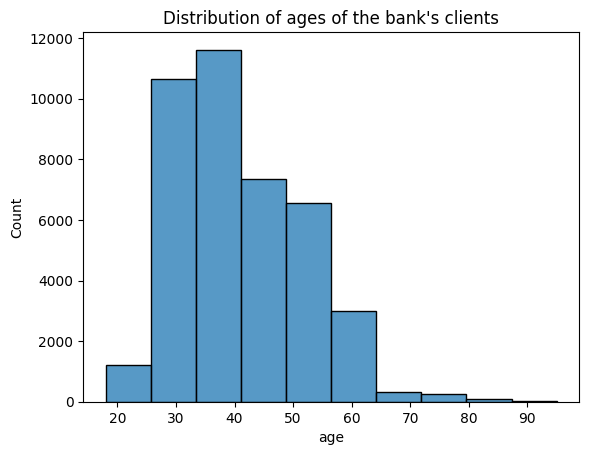

In [ ]:
# Draw plot
sns.histplot(data=df,
             x='age',
             bins=10 # Playaround with different bins number
             )

# Add title
plt.title("Distribution of ages of the bank's clients")

# Add label
plt.ylabel('Count')

# Show the plot
plt.show()

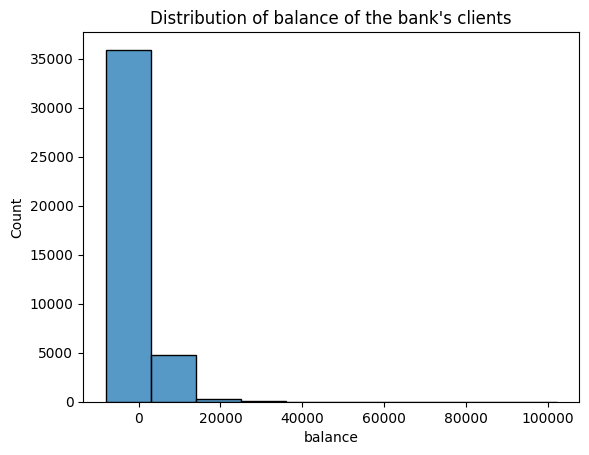

In [ ]:
# Draw plot
sns.histplot(data=df,
             x='balance',
             bins= 10 # Playaround with different bins number
             )

# Add title
plt.title("Distribution of balance of the bank's clients")

# Add label
plt.ylabel('Count')

# Show the plot
plt.show()

In [ ]:
df.shape

(41048, 8)

In [ ]:
# merapikan data balance dengan menghilangkan nilai-nilai balance yang jauh
Q1 = df['balance'].quantile(0.25)
Q3 = df['balance'].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df['balance'] < (Q1 - 1.5 * IQR)) | (df['balance'] > (Q3 + 1.5 * IQR)))]
df.shape

(36770, 8)

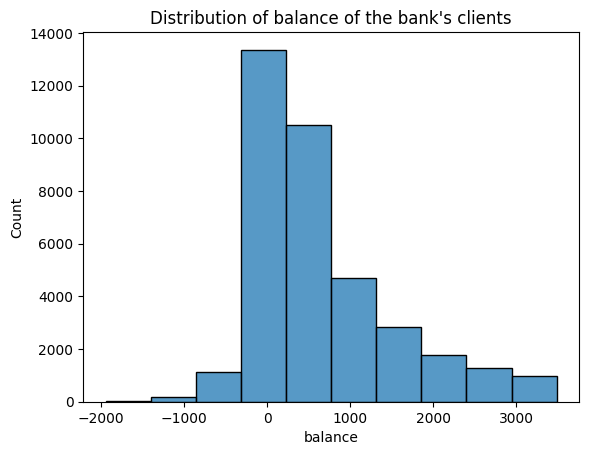

In [ ]:
# membuat plot dari balance yang sudah dirapikan
sns.histplot(data=df,
             x='balance',
             bins= 10 # Playaround with different bins number
             )

# Add title
plt.title("Distribution of balance of the bank's clients")

# Add label
plt.ylabel('Count')

# Show the plot
plt.show()

In [ ]:
data_kmodes = df.copy()

# Preview first 5 rows of data
data_kmodes.head()

,age,job,marital,education,default,housing,loan,balance
0,58,management,married,tertiary,no,yes,no,2143
1,44,technician,single,secondary,no,yes,no,29
2,33,entrepreneur,married,secondary,no,yes,yes,2
3,47,blue-collar,married,unknown,no,yes,no,1506
4,33,unknown,single,unknown,no,no,no,1


In [ ]:
# Bin `age` column into 10 bins from 10 to 100, change type into category
data_kmodes['age_binned'] = pd.cut(data_kmodes['age'], bins=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]).astype('category')

# Drop `age` column
data_kmodes.drop('age', axis=1, inplace=True)

# fix this code
# Show first 5 rows
data_kmodes.head()

,job,marital,education,default,housing,loan,balance,age_binned
0,management,married,tertiary,no,yes,no,2143,"(50, 60]"
1,technician,single,secondary,no,yes,no,29,"(40, 50]"
2,entrepreneur,married,secondary,no,yes,yes,2,"(30, 40]"
3,blue-collar,married,unknown,no,yes,no,1506,"(40, 50]"
4,unknown,single,unknown,no,no,no,1,"(30, 40]"


In [ ]:
# show balance range from min to max
data_kmodes['balance'].min(), data_kmodes['balance'].max()

(-1944, 3486)

In [ ]:
# bin 'balance' column from -2000 to 3500, change type into category
data_kmodes['balance_binned'] = pd.cut(data_kmodes['balance'], bins=[-2000, -1500, -1000, -500, 0, 500, 1000, 1500, 2000, 2500, 3000, 3500]).astype('category')

# Drop 'balance' column
data_kmodes.drop('balance', axis=1, inplace=True)

# Show first 5 rows
data_kmodes.head()

,job,marital,education,default,housing,loan,age_binned,balance_binned
0,management,married,tertiary,no,yes,no,"(50, 60]","(2000, 2500]"
1,technician,single,secondary,no,yes,no,"(40, 50]","(0, 500]"
2,entrepreneur,married,secondary,no,yes,yes,"(30, 40]","(0, 500]"
3,blue-collar,married,unknown,no,yes,no,"(40, 50]","(1500, 2000]"
4,unknown,single,unknown,no,no,no,"(30, 40]","(0, 500]"


In [ ]:
data_kmodes.dtypes

,0
job,category
marital,category
education,category
default,category
housing,category
loan,category
age_binned,category
balance_binned,category


In [ ]:
data_kmodes.shape

(36770, 8)

In [ ]:
data_kmodes = pd.get_dummies(data_kmodes, drop_first=True)
data_kmodes.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,"balance_binned_(-1500, -1000]","balance_binned_(-1000, -500]","balance_binned_(-500, 0]","balance_binned_(0, 500]","balance_binned_(500, 1000]","balance_binned_(1000, 1500]","balance_binned_(1500, 2000]","balance_binned_(2000, 2500]","balance_binned_(2500, 3000]","balance_binned_(3000, 3500]"
0,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [ ]:
data_kmodes.shape

(36770, 37)

In [ ]:
n_clusters = list(range(1, 11))
costs = []

for k in n_clusters:
    # Create a KModes instance
    kmodes = KModes(n_clusters=k, init='random', n_init=10, max_iter=500, random_state=42)
    kmodes.fit(data_kmodes)
    cost = kmodes.cost_
    costs.append(cost)

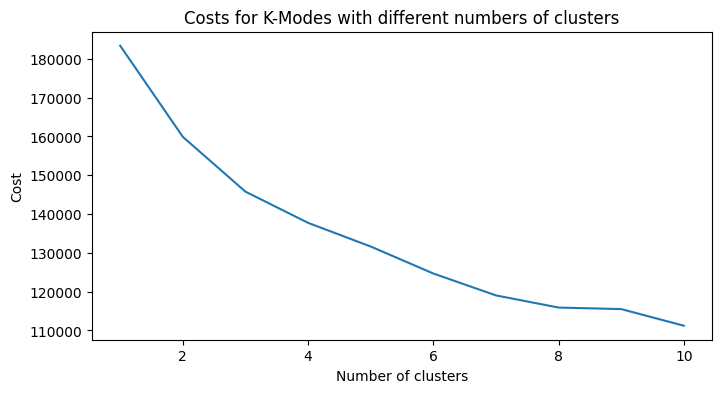

In [ ]:
# Plotting the cost:

plt.figure(figsize=(8,4))
plt.plot(n_clusters, costs)
# plt.axvline(2, linestyle='--', c='r')
# plt.axvline(4, linestyle='--', c='r')
plt.xlabel('Number of clusters')
plt.ylabel('Cost')
plt.title('Costs for K-Modes with different numbers of clusters')
plt.show()

In [ ]:
kmodes = KModes(n_clusters=3, init='random', n_init=10, max_iter=500, random_state=42)
df['cluster_k-modes'] = kmodes.fit_predict(data_kmodes)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

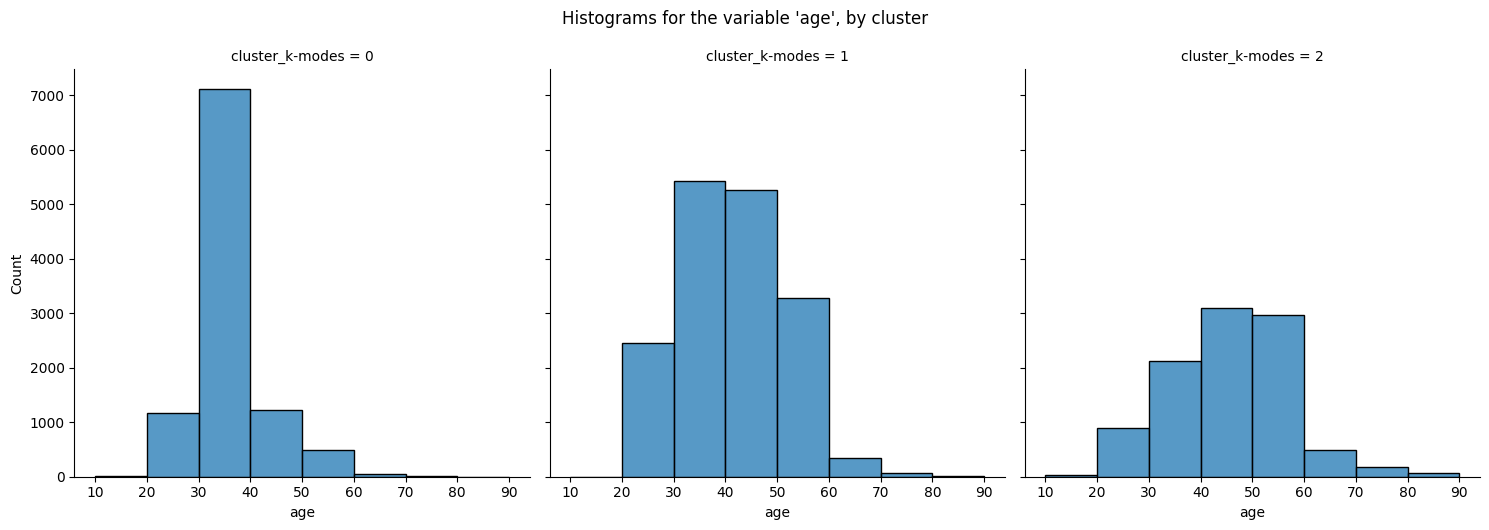

In [ ]:
# histogram cluster berdasarkan age
g = sns.displot(data=df,
                x='age',
                col='cluster_k-modes',
                bins=[10, 20, 30, 40, 50, 60, 70, 80, 90]
                )

g.fig.suptitle("Histograms for the variable 'age', by cluster", y=1.05)

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

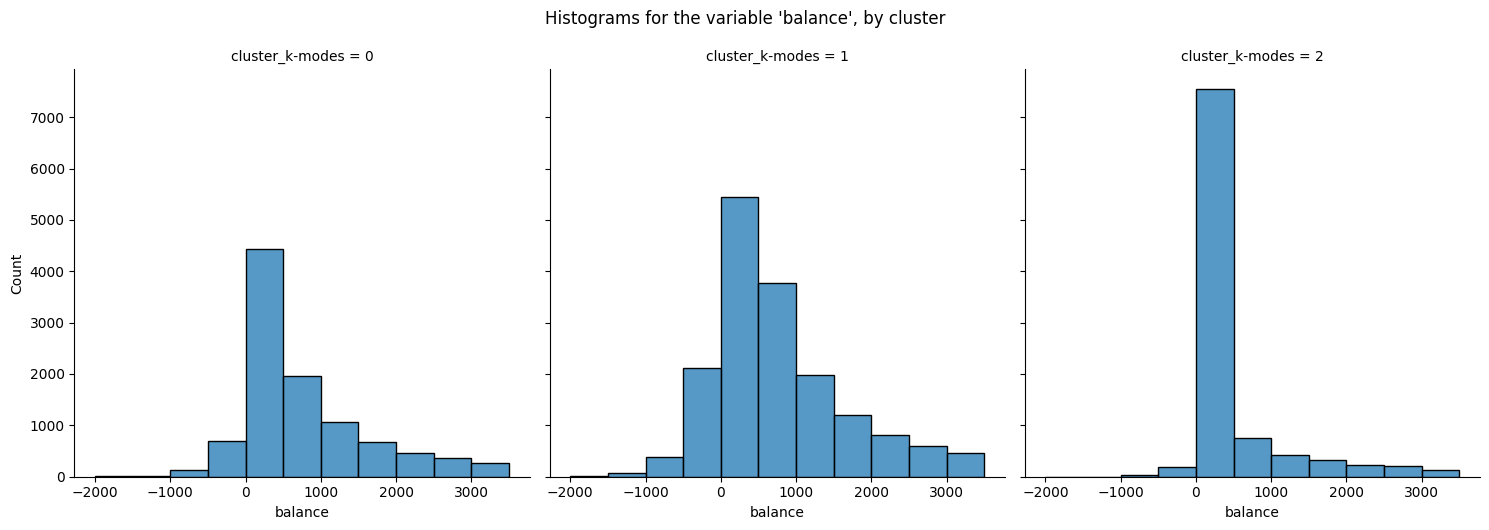

In [ ]:
# histogram cluster berdasarkan balance
g = sns.displot(data=df,
                x='balance',
                col='cluster_k-modes',
                bins=[-2000, -1500, -1000, -500, 0, 500, 1000, 1500, 2000, 2500, 3000, 3500]
                )

g.fig.suptitle("Histograms for the variable 'balance', by cluster", y=1.05)

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

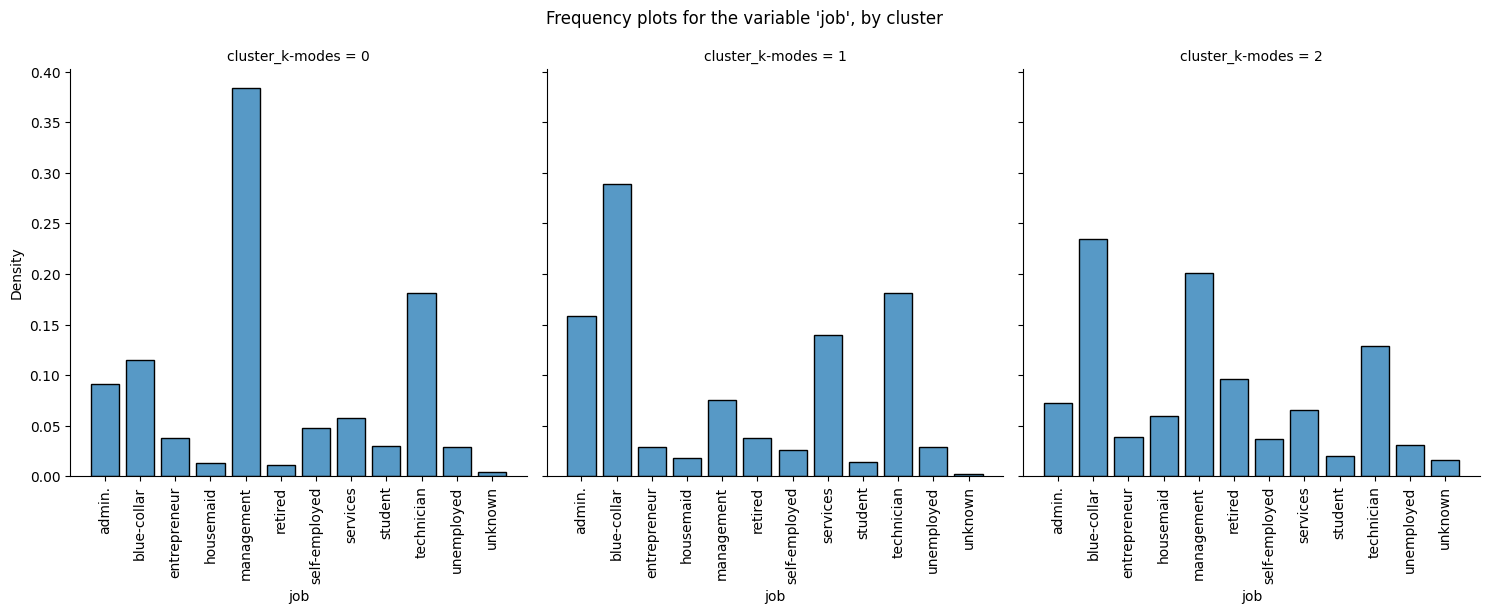

In [ ]:
# histogram cluster berdasarkan job
g = sns.displot(data=df,
                x='job',
                col='cluster_k-modes',
                multiple="dodge",
                stat='density',
                shrink=0.8,
                common_norm=False)

g.set_xticklabels(rotation=90)

g.fig.suptitle("Frequency plots for the variable 'job', by cluster", y=1.05)

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

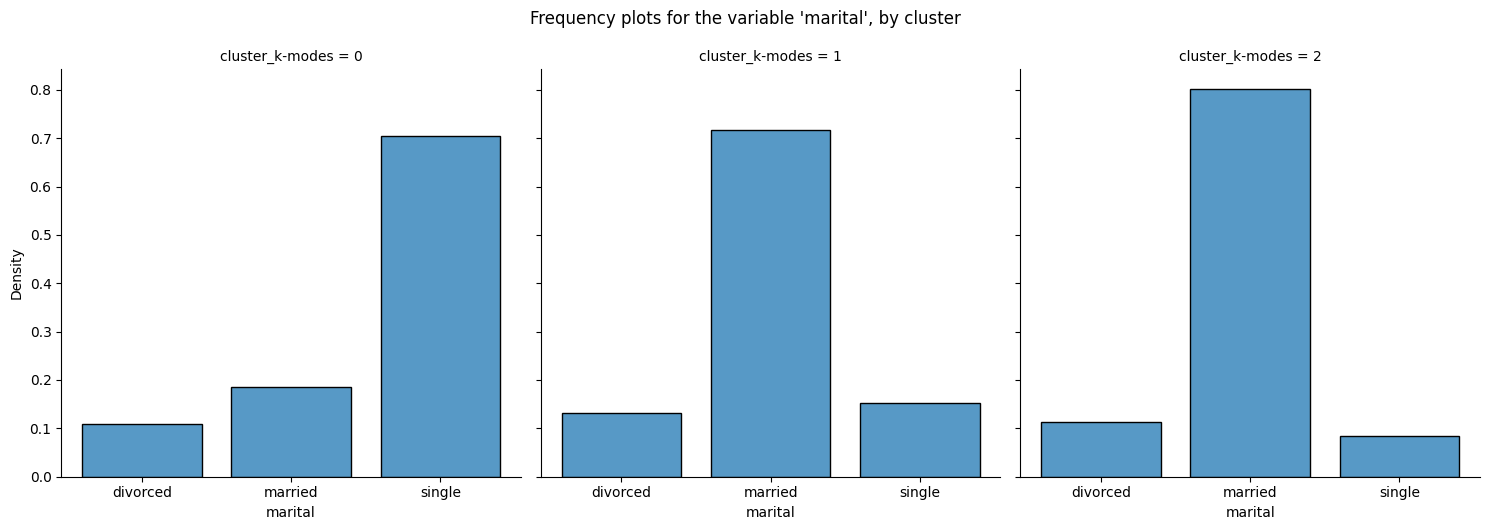

In [ ]:
# histogram cluster berdasarkan marital
g = sns.displot(data=df,
                x='marital',
                col='cluster_k-modes',
                multiple="dodge",
                stat='density',
                shrink=0.8,
                common_norm=False)

g.fig.suptitle("Frequency plots for the variable 'marital', by cluster", y=1.05)

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

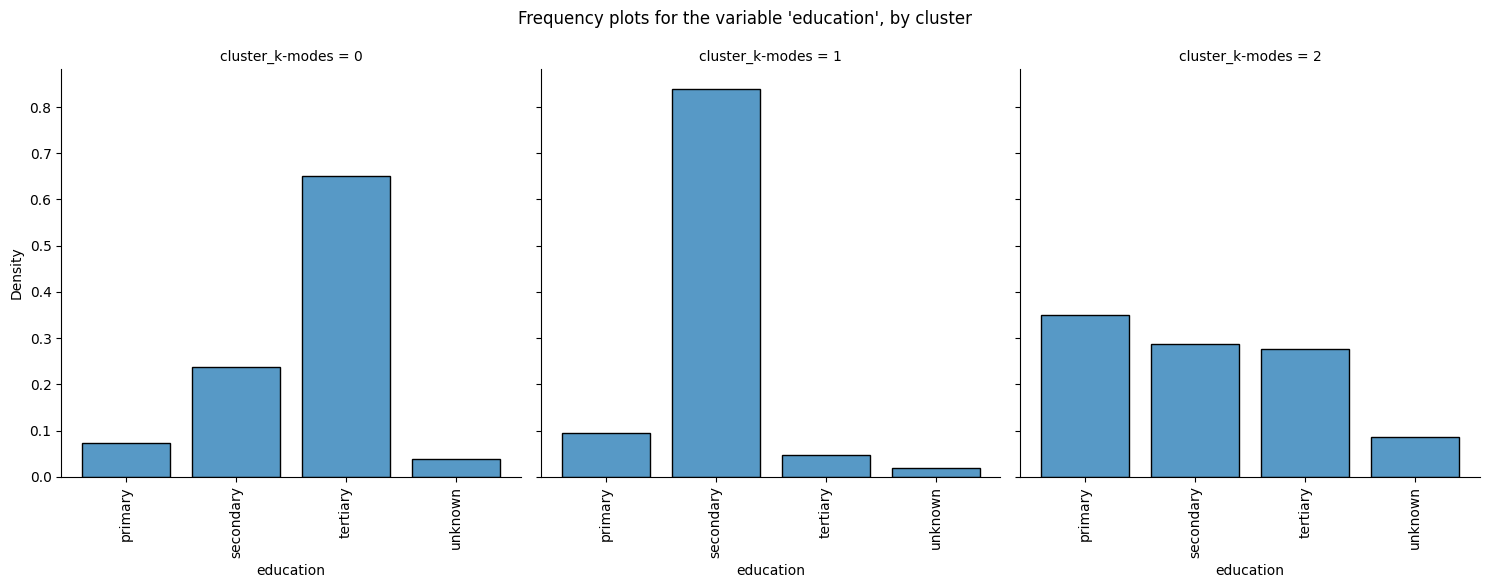

In [ ]:
# histogram cluster berdasarkan education
g = sns.displot(data=df,
                x='education',
                col='cluster_k-modes',
                multiple="dodge",
                stat='density',
                shrink=0.8,
                common_norm=False)

g.set_xticklabels(rotation=90)

g.fig.suptitle("Frequency plots for the variable 'education', by cluster", y=1.05)

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

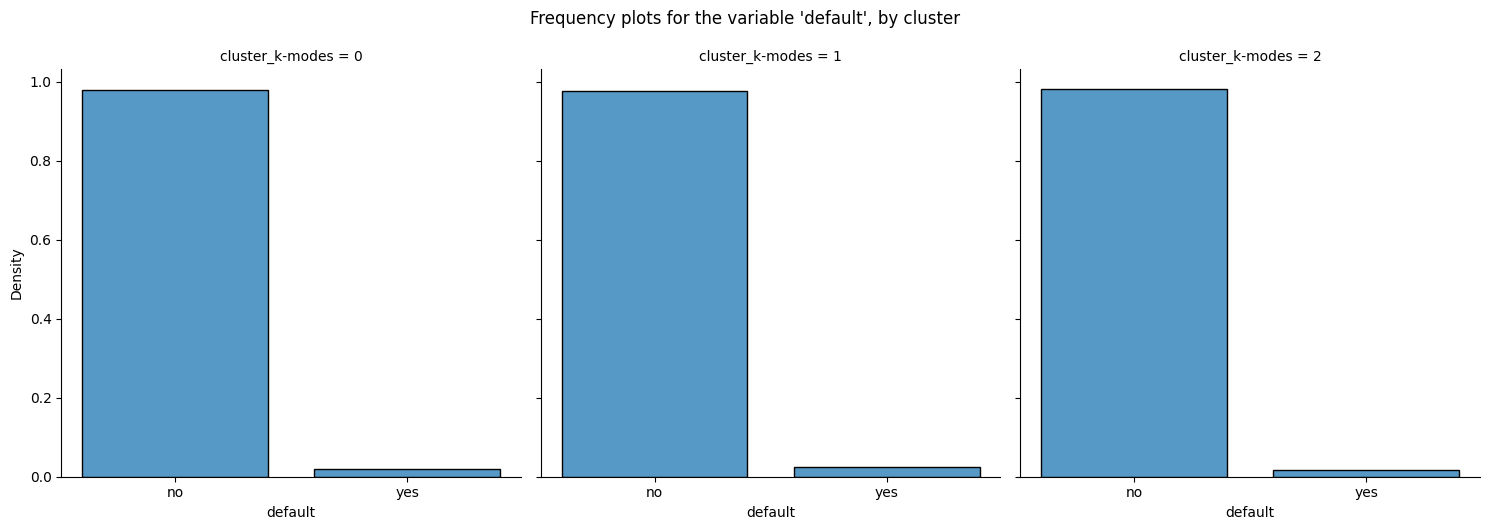

In [ ]:
# histogram cluster berdasarkan default
g = sns.displot(data=df,
                x='default',
                col='cluster_k-modes',
                multiple="dodge",
                stat='density',
                shrink=0.8,
                common_norm=False)

g.fig.suptitle("Frequency plots for the variable 'default', by cluster", y=1.05)

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

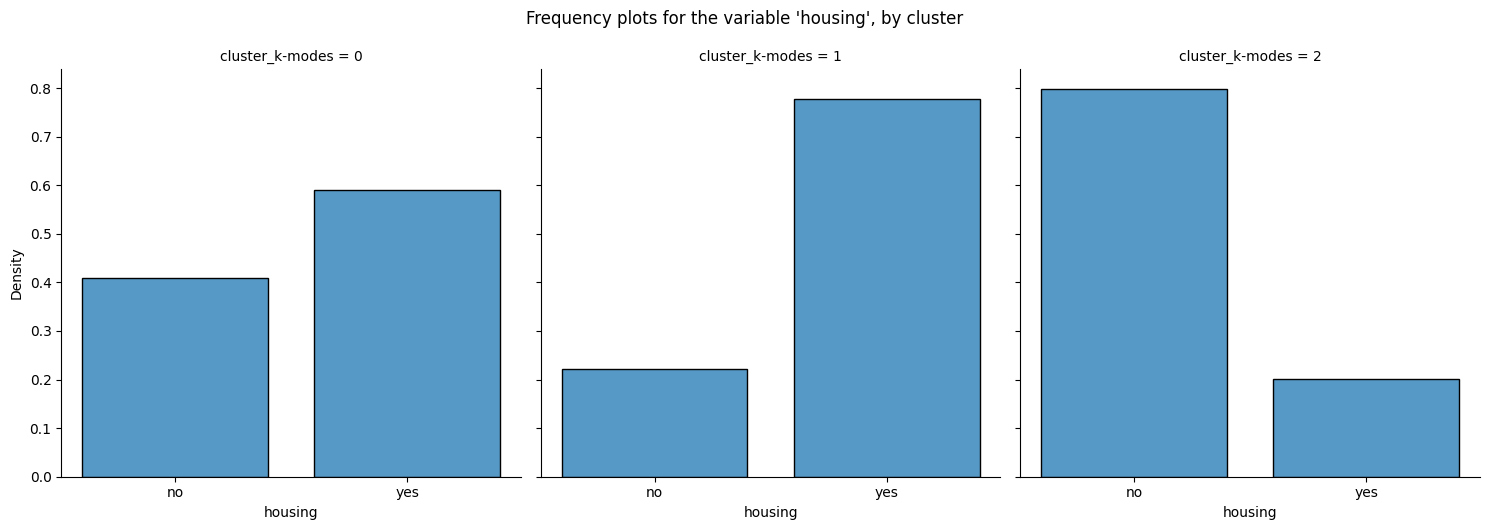

In [ ]:
# histogram cluster berdasarkan housing
g = sns.displot(data=df,
                x='housing',
                col='cluster_k-modes',
                multiple="dodge",
                stat='density',
                shrink=0.8,
                common_norm=False)

g.fig.suptitle("Frequency plots for the variable 'housing', by cluster", y=1.05)

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

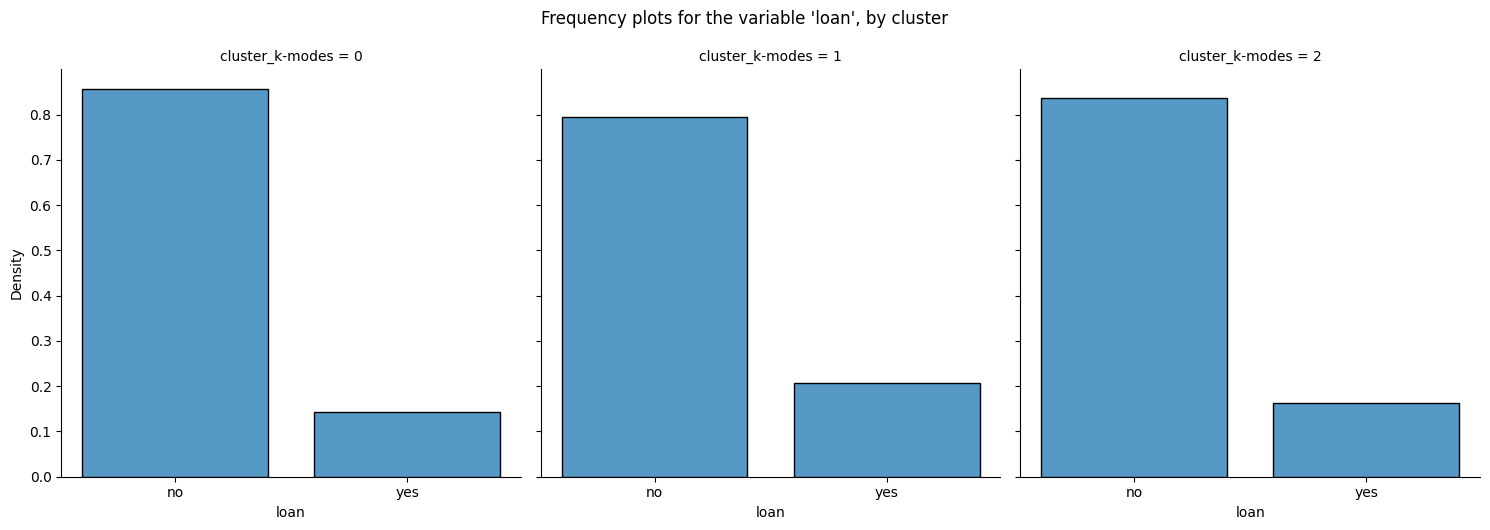

In [ ]:
# histogram cluster berdasarkan loan
g = sns.displot(data=df,
                x='loan',
                col='cluster_k-modes',
                multiple="dodge",
                stat='density',
                shrink=0.8,
                common_norm=False)

g.fig.suptitle("Frequency plots for the variable 'loan', by cluster", y=1.05)

plt.show()

- What can we learn about the data?


| Variable |1 |2 | 3|
|-|-|-|-|
|`age`| 30-40 | 20-60 | 30-60 |
|`balance`| 0 - 1000 | -500 - 1000 | 0 - 500 |
|`job`| management, technician | admin, blue-collar, technician | management, blue-collar, technician |
|`marital`| single | married-marital | married-marital |
|`education`| tertiary | secondary | primary, secondary, tertiary |
|`default`| no | no | no |
|`housing`| no, yes | yes | no |
|`loan`| no | no | no |

- What can we conclude?

#### Cluster 1: Usia 30-40 tahun, berpendidikan tinggi, namun masih single, pekerjaan sebagai manajemen dan juga teknisi, tanpa hutang, kondisi tabungannya baik

#### Cluster 2: Usia 20-60 tahun, kebanyakan tingkat pendidikan hingga SMA, pekerjaan beragam dari pekerja kasar hingga admin, sebagian memiliki hutang, dan kebanyakan memiliki rumah dan berumah tangga, kondisi tabungannya kurang baik

#### Cluster 3: Usia 30-60 tahun, tingkat pendidikan beragam, pekerjaannya beragam, kebanyakan berumah tangga namun belum memiliki rumah, kondisi tabungannya biasa saja